In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras import backend as K

In [2]:
img_width, img_height = 150, 150
train_dir = '/content/drive/MyDrive/Brain Tumor Project/TRAIN'
validation_data_dir = '/content/drive/MyDrive/Brain Tumor Project/TEST'
nb_train_sample = 3000
nb_validation_sample = 1600
epochs = 50
batch_size = 20

In [3]:
# MODEL
if K.image_data_format() == 'channels_first':
    input_shape = (3,img_height,img_width)
else:
    input_shape = (img_height,img_width,3)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1. /255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height),
                                                   batch_size=batch_size,class_mode='binary')

Found 3000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),
                                                   batch_size=batch_size,class_mode='binary')

Found 1668 images belonging to 2 classes.


In [8]:
model = Sequential();
model.add(Conv2D(32, (3, 3), input_shape=input_shape));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(2, 2)));
#model.summary()

In [9]:
model.add(Conv2D(32, (3, 3)));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(2, 2)));

In [10]:
model.add(Conv2D(64, (3, 3)));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(2, 2)));

In [11]:
model.add(Flatten());
model.add(Dense(64));
model.add(Activation('relu'));
model.add(Dropout(0.5));
model.add(Dense(1));
model.add(Activation('sigmoid'));

In [12]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])

In [13]:
history = model.fit_generator(train_generator,
                    steps_per_epoch= nb_train_sample // batch_size,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps = nb_validation_sample // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
150/150 [==============================] - 670s 4s/step - loss: 0.5946 - accuracy: 0.6950 - val_loss: 0.8468 - val_accuracy: 0.6706
Epoch 2/25
150/150 [==============================] - 120s 799ms/step - loss: 0.4706 - accuracy: 0.7907 - val_loss: 0.3821 - val_accuracy: 0.8413
Epoch 3/25
150/150 [==============================] - 114s 758ms/step - loss: 0.4051 - accuracy: 0.8247 - val_loss: 0.3079 - val_accuracy: 0.8731
Epoch 4/25
150/150 [==============================] - 114s 758ms/step - loss: 0.3537 - accuracy: 0.8510 - val_loss: 0.2986 - val_accuracy: 0.8856
Epoch 5/25
150/150 [==============================] - 114s 762ms/step - loss: 0.3153 - accuracy: 0.8730 - val_loss: 0.3321 - val_accuracy: 0.8681
Epoch 6/25
150/150 [==============================] - 115s 767ms/step - loss: 0.2635 - accuracy: 0.8910 - val_loss: 0.2149 - val_accuracy: 0.9112
Epoch 7/25
150/150 [==============================] - 115s 764ms/step - loss: 0.2357 - accuracy: 0.9040 - val_loss: 0.1832 - va

In [14]:
model.save('model3.h5')

In [15]:
import matplotlib.pyplot as plt

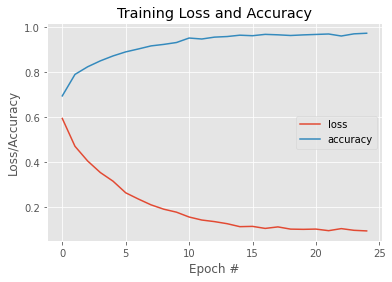

In [16]:
# plot the training loss and accuracy
N = 25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")